# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [ ]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

## Normalize a Slice
Normalization improves contrast.

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

In [ ]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


MRI Shape: (240, 240, 155)


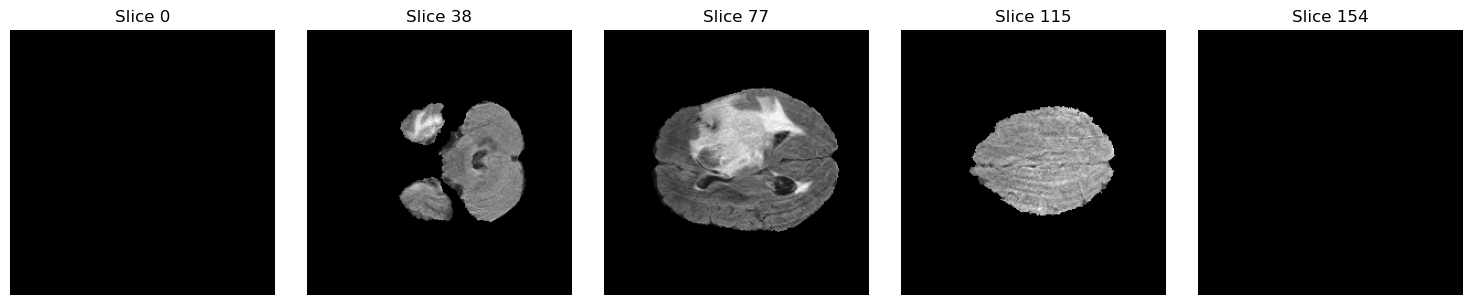

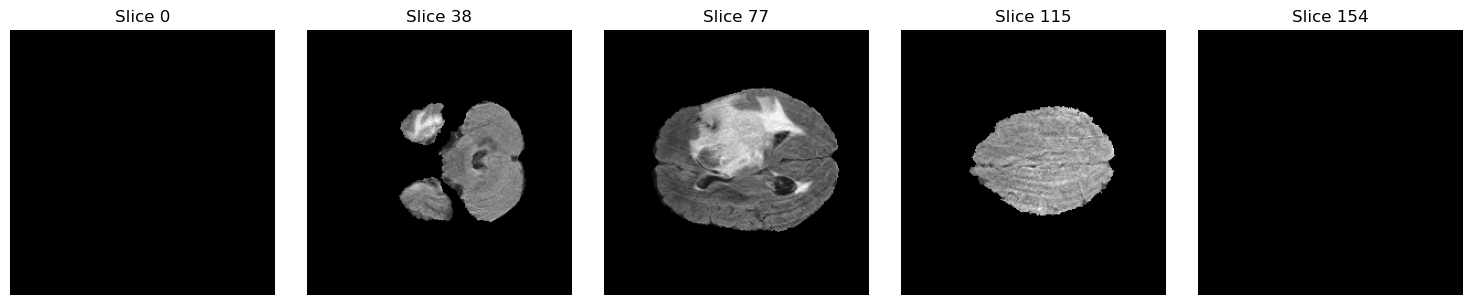

In [11]:
# ===============================
# MRI Loading, Visualization & Normalization (Jupyter Notebook)
# ===============================

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# ---- Load MRI file (update path) ----
file_path = r"C:\Users\divig\Downloads\BraTS20_Training_001_flair.nii\BraTS20_Training_001_flair.nii" 
mri = nib.load(file_path).get_fdata()

print("MRI Shape:", mri.shape)

# ---- Function to plot given slice indices ----
def plot_slices(volume, indices):
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f"Slice {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ---- Function to normalize entire volume ----
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    return (volume - min_val) / (max_val - min_val)

# ---- Plot 5 slices from original MRI ----
slice_indices = np.linspace(0, mri.shape[2]-1, 5, dtype=int)
plot_slices(mri, slice_indices)

# ---- Normalize MRI volume ----
normalized_mri = normalize_volume(mri)

# ---- Plot same 5 slices after normalization ----
plot_slices(normalized_mri, slice_indices)
